In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter
import scipy
from scipy import stats
import seaborn as sns

import random
import pickle as pkl

# Carga de datos
Precio
Ba√±os
Habitaciones
M2
Barrio

In [5]:
# Carga de datos
precio = np.genfromtxt("idealista_madrid.csv", usecols=(0), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
ba√±os = np.genfromtxt("idealista_madrid.csv", usecols=(1), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
habitaciones = np.genfromtxt("idealista_madrid.csv", usecols=(2), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
m2 = np.genfromtxt("idealista_madrid.csv", usecols=(3), delimiter=",", skip_header=1, encoding="utf-8", dtype=np.int64)
barrio = np.genfromtxt("idealista_madrid.csv", usecols=(4), delimiter=",", skip_header=1, encoding="utf-8", dtype=str)

In [6]:
### ELIMINAR
print(barrio.dtype)
print(barrio.shape)

<U31
(915,)


In [7]:
## Media y mediana
print(f"Precio medio: {round(np.mean(precio), 2)}") 
print(f"Media de ba√±os: {round(np.mean(ba√±os), 2)}") 
print(f"Media de habitaciones: {round(np.mean(habitaciones), 2)}") 
print(f"Media de metros2: {round(np.mean(m2), 2)}") 
print("\n")
print(f"Mediana del precio: {(np.median(precio))}")
print(f"Mediana de ba√±os: {(np.median(ba√±os))}") 
print(f"Mediana de habitaciones: {(np.median(habitaciones))}")
print(f"Mediana de metros2: {(np.median(m2))}") 


Precio medio: 1290575.26
Media de ba√±os: 2.9
Media de habitaciones: 3.47
Media de metros2: 217.24


Mediana del precio: 990000.0
Mediana de ba√±os: 3.0
Mediana de habitaciones: 3.0
Mediana de metros2: 158.0


In [8]:
## M√°ximo y m√≠nimo
print(f"El piso m√°s caro vale {(np.max(precio))} ‚Ç¨")
print(f"El piso m√°s barato vale {(np.min(precio))} ‚Ç¨")
print(f"El piso con m√°s ba√±os, tiene {(np.max(ba√±os))} ba√±os ")
print(f"El piso con menos ba√±os, tiene {(np.min(ba√±os))} ba√±o")
print(f"El piso con m√°s habitaciones, tiene {(np.max(habitaciones))} habitaciones")
print(f"El piso que menos habitaciones, tiene {(np.min(habitaciones))} habitaciones")
print(f"El piso m√°s grande tiene {(np.max(m2))} m2 ")
print(f"El piso m√°s peque√±o tiene {(np.min(m2))} m2 ")


El piso m√°s caro vale 8900000 ‚Ç¨
El piso m√°s barato vale 122000 ‚Ç¨
El piso con m√°s ba√±os, tiene 12 ba√±os 
El piso con menos ba√±os, tiene 1 ba√±o
El piso con m√°s habitaciones, tiene 12 habitaciones
El piso que menos habitaciones, tiene 0 habitaciones
El piso m√°s grande tiene 1768 m2 
El piso m√°s peque√±o tiene 14 m2 


In [9]:
## Histograma y curva de densidad

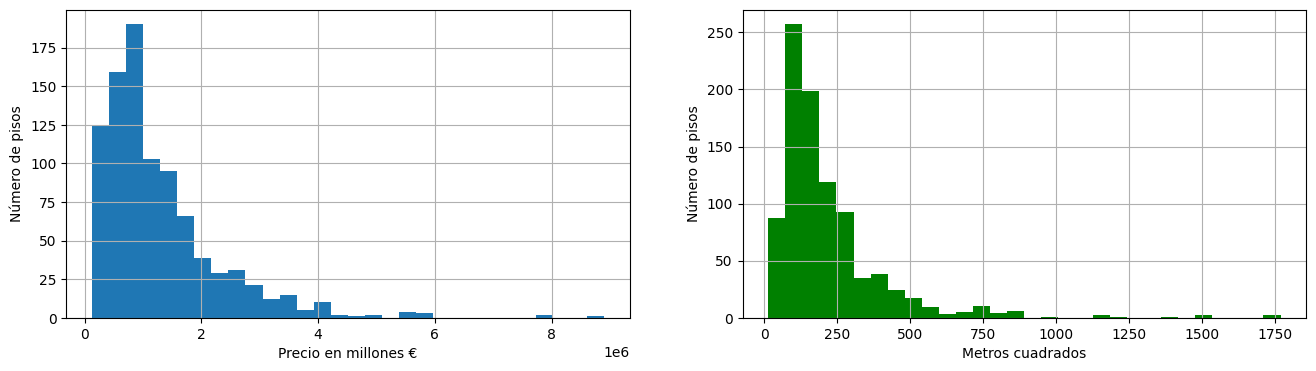

In [10]:
# Histograma precio y m2
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) # Precio
plt.hist(precio, bins=30)
plt.xlabel("Precio en millones ‚Ç¨")
plt.ylabel("N√∫mero de pisos")
plt.grid()

plt.subplot(1, 2, 2) # Metros
plt.hist(m2, bins=30, color="green")
plt.xlabel("Metros cuadrados")
plt.ylabel("N√∫mero de pisos")
plt.grid()

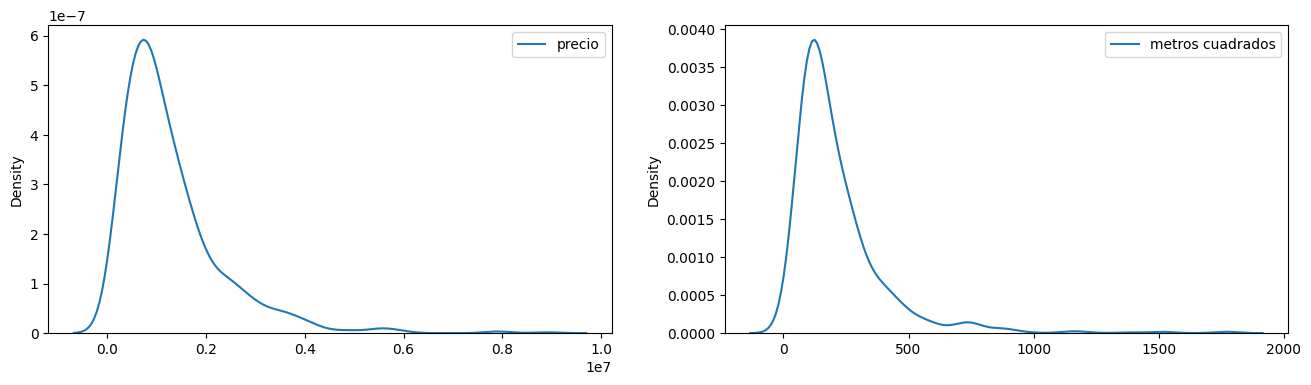

In [11]:
# Densidad precio y m2
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) # Primer gr√°fico
sns.kdeplot(precio, label= "precio")
plt.legend();

plt.subplot(1, 2, 2) # Primer gr√°fico
sns.kdeplot(m2, label= "metros cuadrados")
plt.legend();

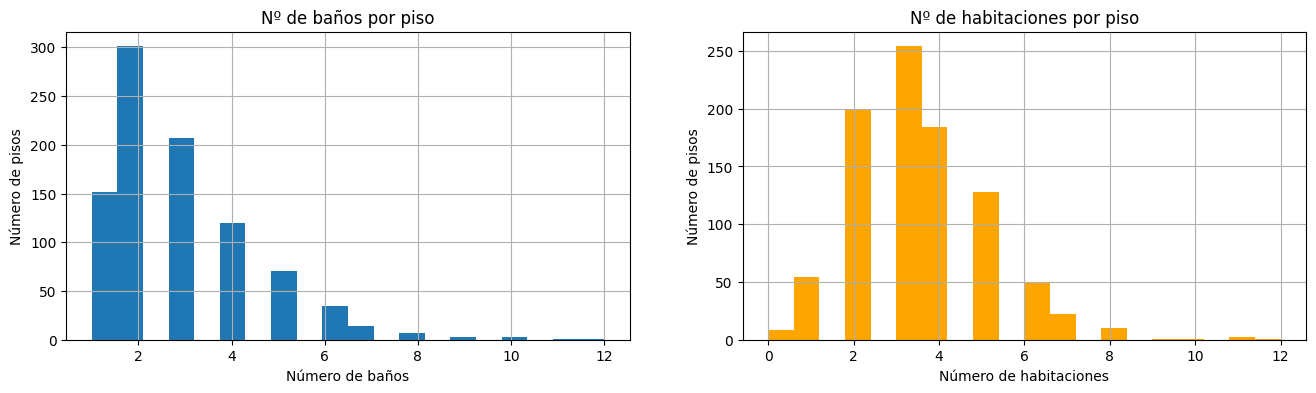

In [12]:
# Ba√±os y habitaciones
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1) # Ba√±os
plt.hist(ba√±os, bins=20)
plt.title("N¬∫ de ba√±os por piso")
plt.xlabel("N√∫mero de ba√±os")
plt.ylabel("N√∫mero de pisos")
plt.grid()

plt.subplot(1, 2, 2) # Habitaciones
plt.hist(habitaciones, bins=20, color="orange")
plt.title("N¬∫ de habitaciones por piso")
plt.xlabel("N√∫mero de habitaciones")
plt.ylabel("N√∫mero de pisos")
plt.grid()

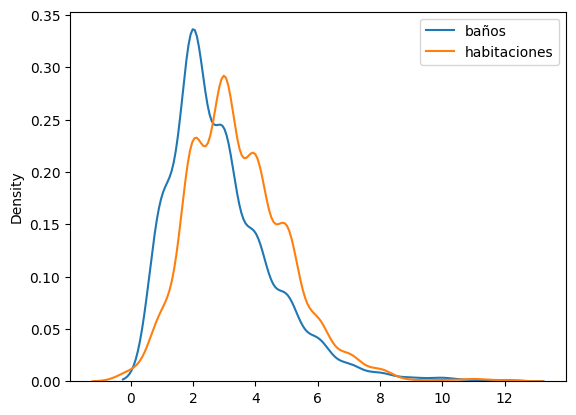

In [13]:
# Densidad ba√±os y habitaciones
sns.kdeplot(ba√±os, label= "ba√±os")
sns.kdeplot(habitaciones, label= "habitaciones")
plt.legend();

In [14]:
## Cuartiles: Q1, Q2, Q3

In [15]:
Q_precio= np.quantile(a = precio, q = [0.25, 0.50, 0.75], interpolation = "lower")
Q_ba√±os= np.quantile(a = ba√±os, q = [0.25, 0.50, 0.75], interpolation = "lower")
Q_habitaciones= np.quantile(a = habitaciones, q = [0.25, 0.50, 0.75], interpolation = "lower")
Q_metros= np.quantile(a = m2, q = [0.25, 0.50, 0.75], interpolation = "lower")
print(f"El 25% de los pisos vale menos de {Q_precio[0]} ‚Ç¨, tiene {Q_ba√±os[0]} ba√±os, {Q_habitaciones[0]} habitaciones y {Q_metros[0]} m2.")
print(f"El 50% de los pisos vale menos de {Q_precio[1]} ‚Ç¨, tiene {Q_ba√±os[1]} ba√±os, {Q_habitaciones[1]} habitaciones y {Q_metros[1]} m2.")
print(f"El 75% de los pisos vale menos de {Q_precio[2]} ‚Ç¨, tiene {Q_ba√±os[2]} ba√±os, {Q_habitaciones[2]} habitaciones y {Q_metros[2]} m2.")



El 25% de los pisos vale menos de 625000 ‚Ç¨, tiene 2 ba√±os, 2 habitaciones y 104 m2.
El 50% de los pisos vale menos de 990000 ‚Ç¨, tiene 3 ba√±os, 3 habitaciones y 158 m2.
El 75% de los pisos vale menos de 1650000 ‚Ç¨, tiene 4 ba√±os, 4 habitaciones y 264 m2.


In [16]:
## IQR = Rango intercuartil
IQR_precio = Q_precio[2] - Q_precio[0]
print(IQR_precio)

IQR_ba√±os = Q_ba√±os[2] - Q_ba√±os[0]
print(IQR_ba√±os)

IQR_habitaciones = Q_habitaciones[2] - Q_habitaciones[0]
print(IQR_habitaciones)

IQR_metros = Q_metros[2] - Q_metros[0]
print(IQR_metros)

1025000
2
2
160


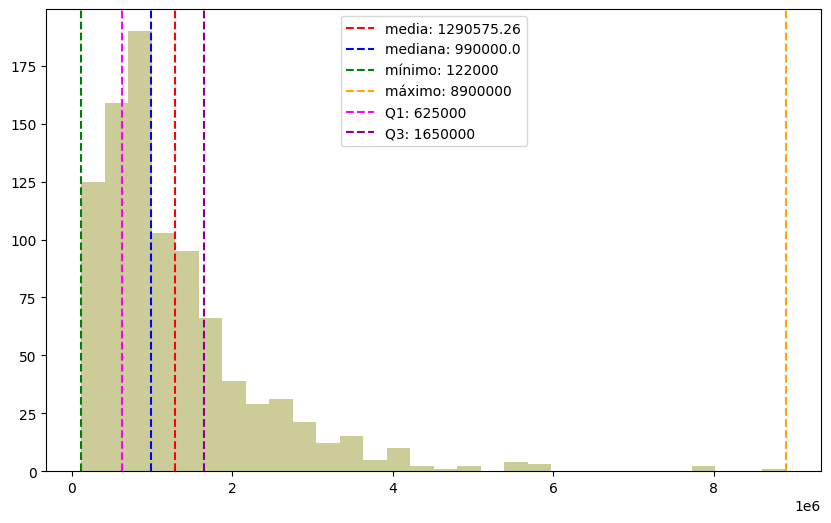

In [17]:
precio_medio = np.mean(precio)
precio_mediana = np.median(precio)
precio_minimo = np.min(precio)
precio_maximo = np.max (precio)


plt.figure(figsize=(10, 6))
plt.hist(precio, bins=30, color='olive', alpha=0.4)
plt.axvline(precio_medio, color='red', linestyle='dashed', label=f'media: {precio_medio:.2f}')
plt.axvline(precio_mediana, color='blue', linestyle='dashed', label=f'mediana: {precio_mediana}')
plt.axvline(precio_minimo, color='green', linestyle='dashed', label=f'm√≠nimo: {precio_minimo}')
plt.axvline(precio_maximo, color='orange', linestyle='dashed', label=f'm√°ximo: {precio_maximo}')
plt.axvline(Q_precio[0], color='magenta', linestyle='dashed', label=f'Q1: {Q_precio[0]}')
plt.axvline(Q_precio[2], color='darkmagenta', linestyle='dashed', label=f'Q3: {Q_precio[2]}')
plt.legend(loc=0);

In [18]:
## Filtrar 20 % m√°s caro, y el 20 % m√°s barato
# Opcional: filtrar los barrios 20 % m√°s baratos

In [19]:
percentil_20 = np.percentile(precio,20)
percentil_80 = np.percentile(precio,80)

Pisos_mas_caros = precio[precio >= percentil_80]
Pisos_mas_baratos = precio[precio <= percentil_20]

Barrios_mas_baratos= barrio[precio <= percentil_20]
Barrios_mas_caros= barrio[precio >= percentil_80]

Pisos_mas_caros.shape
Pisos_mas_baratos.shape


print(f"El 20% m√°s caro, son {Pisos_mas_caros.shape} pisos y tiene un precio medio de {round(np.mean(Pisos_mas_caros), 2)}‚Ç¨")
print(f"El 20% m√°s barato, son {Pisos_mas_baratos.shape} pisos y tiene un precio medio de {round(np.mean(Pisos_mas_baratos), 2)}‚Ç¨")

print("Barrios en el 20% m√°s barato son:", np.unique(Barrios_mas_baratos))

print("Barrios en el 20% m√°s caro son:", np.unique(Barrios_mas_caros))

El 20% m√°s caro, son (185,) pisos y tiene un precio medio de 2915162.16‚Ç¨
El 20% m√°s barato, son (184,) pisos y tiene un precio medio de 350706.89‚Ç¨
Barrios en el 20% m√°s barato son: ['12 de Octubre-Orcasur' 'Acacias' 'Almendrales' 'Amposta' 'Arapiles'
 'Arg√ºelles' 'Barajas' 'Bellas Vistas' 'Berruguete' 'Buena Vista'
 'Butarque' 'Campamento' 'Canillas' 'Casco Hist√≥rico de Barajas'
 'Castellana' 'Castilla' 'Centro' 'Chamart√≠n' 'Chamber√≠' 'Chopera'
 'Chueca-Justicia' 'Ciudad Jard√≠n' 'Ciudad Lineal' 'Ciudad Universitaria'
 'Colina' 'Comillas' 'Concepci√≥n' 'Conde Orgaz-Piovera' 'Costillares'
 'Cuatro Caminos' 'Cuzco-Castillejos' 'Ensanche de Vallecas - La Gavia'
 'Estrella' 'Fuencarral' 'Fuente del Berro' 'Gaztambide' 'Goya'
 'Guindalera' 'Hortaleza' 'Huertas-Cortes' 'Imperial' 'La Paz' 'Latina'
 'Lavapi√©s-Embajadores' 'Los √Ångeles' 'Malasa√±a-Universidad' 'Moncloa'
 'Moratalaz' 'Opa√±el' 'Pac√≠fico' 'Palacio' 'Palomas' 'Palos de Moguer'
 'Pau de Carabanchel' 'Pe√±agrande' 'Pi

In [60]:
### ELIMINAR

print("Precio:", precio.shape)
print("Ba√±os:", ba√±os.shape)
print("Habitaciones:", habitaciones.shape)
print("m2:", m2.shape)
print("Barrio:", barrio.shape)

Precio: (915,)
Ba√±os: (915,)
Habitaciones: (915,)
m2: (915,)
Barrio: (915,)


In [21]:
## Moda: calcular moda tambi√©n de address. Opcional: Moda de los barrios m√°s baratos y m√°s caros

In [22]:
# COMPROBAR PORQUE BORRA LOS BARRIOS
from collections import Counter
contador = Counter(barrio)
contador.items()
moda_barrio = contador.most_common(10)
moda_barrio

[(np.str_('Barrio de Salamanca'), 63),
 (np.str_('Hortaleza'), 60),
 (np.str_('Chamart√≠n'), 54),
 (np.str_('Moncloa'), 48),
 (np.str_('Centro'), 47),
 (np.str_('Fuencarral'), 35),
 (np.str_('Chamber√≠'), 34),
 (np.str_('Malasa√±a-Universidad'), 25),
 (np.str_('Goya'), 22),
 (np.str_('Lista'), 22)]

In [23]:
top10_barrios, conteos = zip(*moda_barrio)
print(top10_barrios)
print(conteos)

(np.str_('Barrio de Salamanca'), np.str_('Hortaleza'), np.str_('Chamart√≠n'), np.str_('Moncloa'), np.str_('Centro'), np.str_('Fuencarral'), np.str_('Chamber√≠'), np.str_('Malasa√±a-Universidad'), np.str_('Goya'), np.str_('Lista'))
(63, 60, 54, 48, 47, 35, 34, 25, 22, 22)


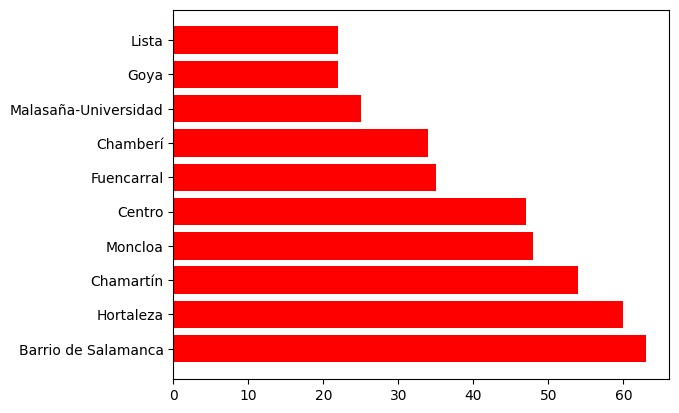

In [24]:
plt.barh(top10_barrios, conteos, color= "red")
plt.show()

In [25]:
moda_precio = stats.mode(precio)
moda_ba√±os = stats.mode(ba√±os)
moda_habitaciones = stats.mode(habitaciones)
moda_metros = stats.mode(m2)


print(f"El precio que m√°s se repite es {moda_precio[0]} ‚Ç¨ con {moda_precio[1]} veces")
print(f"El n¬∫ de ba√±os que m√°s se repite son {moda_ba√±os[0]} ba√±os con {moda_ba√±os[1]} veces")
print(f"El n¬∫ de habitaciones que m√°s se repite {moda_habitaciones[0]} habitaciones con {moda_habitaciones[1]} veces")
print(f"El n¬∫ de metros que m√°s se repite es {moda_metros[0]} m2 con {moda_metros[1]} veces")

El precio que m√°s se repite es 850000 ‚Ç¨ con 15 veces
El n¬∫ de ba√±os que m√°s se repite son 2 ba√±os con 301 veces
El n¬∫ de habitaciones que m√°s se repite 3 habitaciones con 254 veces
El n¬∫ de metros que m√°s se repite es 133 m2 con 12 veces


In [26]:
contador1 = Counter(Barrios_mas_baratos)
contador1.items()
moda_barrios_baratos = contador1.most_common(1)
print(moda_barrios_baratos)


contador2 = Counter(Barrios_mas_caros)
contador2.items()
moda_barrios_caros = contador2.most_common(1)
print(moda_barrios_caros)

[(np.str_('Lavapi√©s-Embajadores'), 12)]
[(np.str_('Hortaleza'), 21)]


In [27]:
## Dispersi√≥n: varianza y desviaci√≥n est√°ndar

In [28]:
print(f"Varianza del precio: {round(np.var(precio), 2)}") 
print(f"Varianza de ba√±os: {round(np.var(ba√±os), 2)}") 
print(f"Varianza de habitaciones: {round(np.var(habitaciones), 2)}") 
print(f"Varianza de metros: {round(np.var(m2), 2)}") 

Varianza del precio: 1073448095137.26
Varianza de ba√±os: 2.64
Varianza de habitaciones: 2.54
Varianza de metros: 36726.28


In [29]:
print(f"Desviaci√≥n del precio: {round(np.std(precio), 2)}") 
print(f"Desviaci√≥n de ba√±os: {round(np.std(ba√±os), 2)}") 
print(f"Desviaci√≥n de habitaciones: {round(np.std(habitaciones), 2)}") 
print(f"Desviaci√≥n de metros: {round(np.std(m2), 2)}") 

Desviaci√≥n del precio: 1036073.4
Desviaci√≥n de ba√±os: 1.63
Desviaci√≥n de habitaciones: 1.59
Desviaci√≥n de metros: 191.64


In [30]:
# Filtro de outliers: tukey, z-score, marcar en un gr√°fico los l√≠mites de outliers: rojo y azul.

In [31]:
# Outliers con la valla de Tukey -- REVISAR
def outliers_tukey(array, k=1.5):
    q1 = np.percentile(array, 25)
    q3 = np.percentile(array, 75)
    iqr = q3 - q1
    lim_l = q1 - k*iqr
    lim_r= q3 + k*iqr
    outliers = [elem for elem in array if elem < lim_l or elem > lim_r]
    normal_data = [elem for elem in array if elem not in outliers]
    return np.array(normal_data), np.array(outliers)
    

In [32]:
normal_data, outliers = outliers_tukey(precio)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers)

Total de no-outliers: 860
Total de outliers: 55
[5700000 3950000 3900000 4950000 7900000 5500000 3500000 3550000 3200000
 3500000 3500000 4300000 5500000 3600000 3900000 5000000 3700000 3600000
 3600000 5900000 4200000 3600000 3500000 3950000 5500000 4200000 8900000
 3465000 3700000 3700000 3490000 3950000 3200000 3200000 3250000 5900000
 3200000 3950000 3195000 3950000 3200000 3600000 4500000 3500000 4200000
 5500000 3500000 4750000 3500000 3195000 4000000 3250000 3300000 3950000
 7900000]


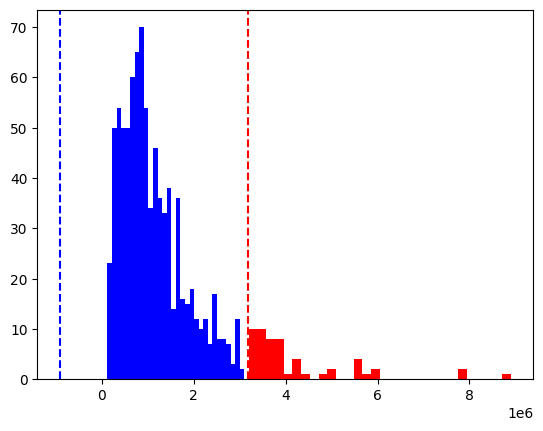

In [33]:
normal_data, outliers = outliers_tukey(precio)

q1 = np.quantile(precio, 0.25)
q3 = np.quantile(precio, 0.75)
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 1.5*ric

# No-Outliers
plt.hist(normal_data, bins = 30, color = "blue")

# Outliers
plt.hist(outliers, bins = 30, color = "red")

# Q1 - 1.5*ric
plt.axvline(lim_l, color = "blue", linestyle = "--")

# Q3 + 1.5*ric
plt.axvline(lim_r, color = "red", linestyle = "--")

plt.show()

In [34]:
# Outliers con Z-Score

def outliers_z_score(array, z = 3):
    mean = np.mean(array)
    std = np.std(array)
    
    lim_l = mean - z*std
    lim_r = mean + z*std
    
    outliers = [elem for elem in array if elem < lim_l or elem > lim_r]  
    normal_data = [elem for elem in array if elem not in outliers]
    
    return np.array(normal_data), np.array(outliers)

In [35]:
normal_data, outliers = outliers_z_score(precio)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers)

Total de no-outliers: 901
Total de outliers: 14
[5700000 4950000 7900000 5500000 5500000 5000000 5900000 5500000 8900000
 5900000 4500000 5500000 4750000 7900000]


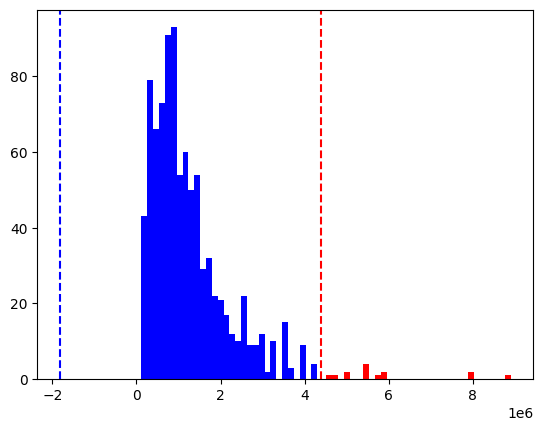

In [36]:
normal_data, outliers = outliers_z_score(precio)
mean = np.mean(precio)
std = np.std(precio)

# Limites laterales
lim_l = mean - 3*std
lim_r = mean + 3*std

# No-Outliers
plt.hist(normal_data, bins = 30, color = "blue")

# Outliers
plt.hist(outliers, bins = 30, color = "red")

# ùúá ¬± 3ùúé
plt.axvline(lim_l, color = "blue", linestyle = "--")
plt.axvline(lim_r, color = "red", linestyle = "--")

plt.show()

In [56]:
# Correlaci√≥n: calcular la matriz y pintarla con matplotlib/seaborn

In [61]:
print(stats.pearsonr(precio, precio)[0])
print(stats.pearsonr(precio, ba√±os)[0])
print(stats.pearsonr(precio, habitaciones)[0])
print(stats.pearsonr(precio, m2)[0])
print(f"La correlaci√≥n entre el precio y los metros cuadrados de los pisos es: {round(stats.pearsonr(precio, m2)[0], 2)}, positiva y alta")


1.0
0.6916252947603247
0.5571893208650728
0.681762407588213
La correlaci√≥n entre el precio y los metros cuadrados de los pisos es: 0.68, positiva y alta


In [39]:
columnas= [precio, ba√±os, habitaciones, m2]
matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
                                           
    matriz_lista.append(fila)
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.69162529 0.55718932 0.68176241]
 [0.69162529 1.         0.77076481 0.81873292]
 [0.55718932 0.77076481 1.         0.71265478]
 [0.68176241 0.81873292 0.71265478 1.        ]]


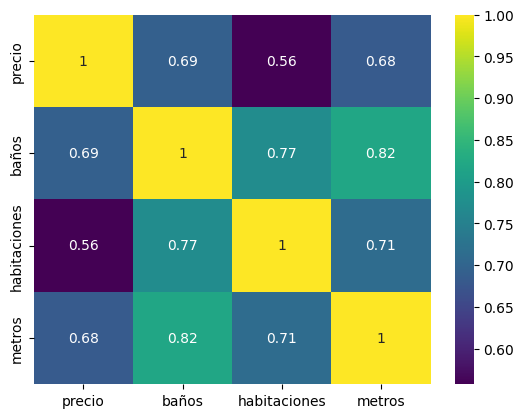

In [57]:
column_names = ["precio", "ba√±os", "habitaciones", "metros"]
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names, yticklabels=column_names);

In [55]:
# Estandarizaci√≥n

In [103]:
print(f"Valores originales de precio")
print(f"Media : {np.mean(precio)}")
print(f"Mediana: {np.median(precio)}")
print(f"Moda: {stats.mode(precio)[0]}")
print(f"std: {np.std(precio)}") 
print("\n")
print(f"Valores originales de metros")
print(f"Media: {np.mean(m2)}")
print(f"Mediana: {np.median(m2)}")
print(f"Moda: {stats.mode(m2)[0]}")
print(f"std: {np.std(m2)}")

Valores originales de precio
Media : 1290575.262295082
Mediana: 990000.0
Moda: 850000
std: 1036073.4023886833


Valores originales de metros
Media: 217.2382513661202
Mediana: 158.0
Moda: 133
std: 191.64101817802054


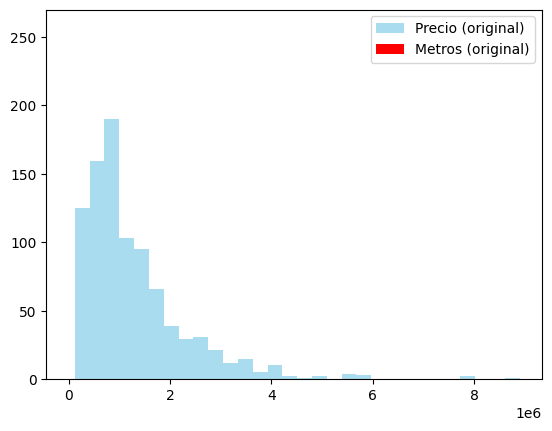

In [105]:
plt.hist(precio, bins=30, color="skyblue", alpha=0.7, label="Precio (original)")
plt.hist(m2, bins=30, color="red", label="Metros (original)")
plt.legend();

In [130]:
media_precio = np.mean(precio)
media_metros = np.mean(m2)

std_precio = np.std(precio)
std_metros = np.std(m2)

precio_estandar = (precio - media_precio) / std_precio
metros_estandar = (m2 - media_metros) / std_metros

print(precio_estandar[:5])
print(metros_estandar[:5])


[0.60750979 0.67989849 0.00909659 0.3469105  0.28972343]
[-0.17865826 -0.24649343  0.27531553  0.16051756 -0.52827026]


In [85]:
print(f"Valores estandarizados de precio")

print(f"Media precio: {np.mean(precio_estandar)}")
print(f"Mediana: {np.median(precio_estandar)}")
print(f"Moda: {stats.mode(precio_estandar)[0]}")
print(f"std: {np.std(precio_estandar)}")
print("\n")
print(f"Valores estandarizados de metros")
print(f"Media: {np.mean(metros_estandar)}")
print(f"Mediana: {np.median(metros_estandar)}")
print(f"Moda: {stats.mode(metros_estandar)[0]}")
print(f"std: {np.std(metros_estandar)}")

Valores estandarizados de precio
Media precio: -1.9413735949729513e-17
Mediana: -0.290110007265992
Moda: -0.4252355685218141
std: 0.9999999999999999


Valores estandarizados de metros
Media: 4.271021908940493e-17
Mediana: -0.30911050217387276
Moda: -0.4395627416666562
std: 1.0


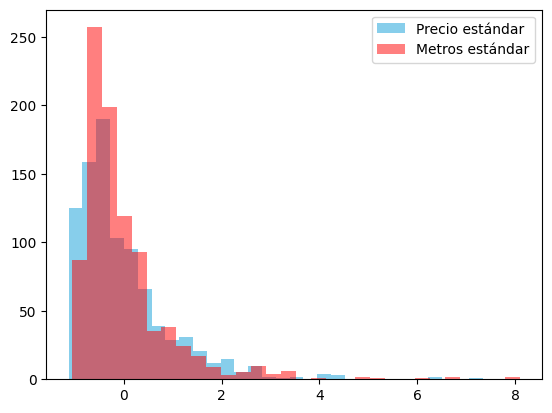

In [93]:
plt.hist(precio_estandar, bins=30, color="skyblue", label="Precio est√°ndar")
plt.hist(metros_estandar, bins=30, color="red",  alpha=0.5, label="Metros est√°ndar")
plt.legend();

In [116]:
# Coeficiente de asimetr√≠a
print(f"Coeficiente de asimetr√≠a precio: {stats.skew(precio)}")
print(f"Coeficiente de asimetr√≠a metros: {stats.skew(m2)}")

Coeficiente de asimetr√≠a precio: 2.299673447902698
Coeficiente de asimetr√≠a metros: 3.358506945156488


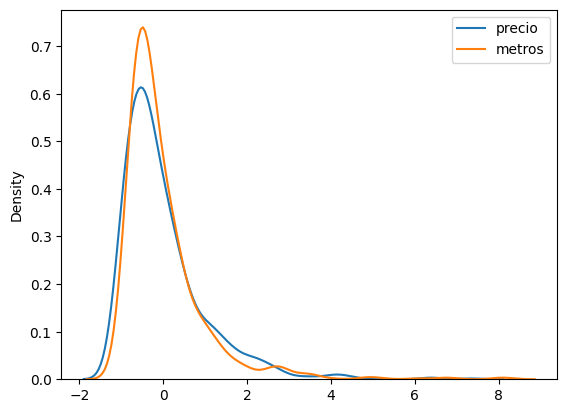

In [123]:
sns.kdeplot(precio_estandar, label="precio")
sns.kdeplot(metros_estandar, label="metros")
plt.legend();


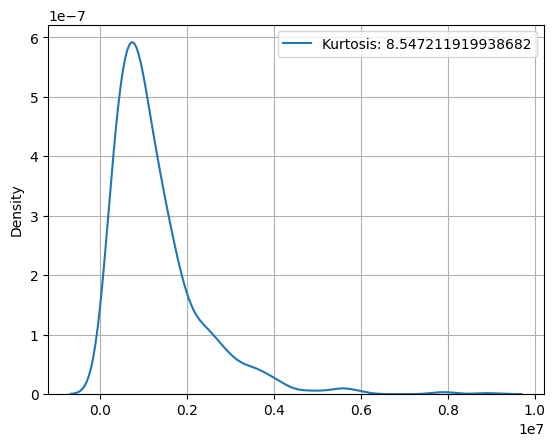

In [ ]:
# Curtosis = mayor n√∫mero de datos alejados de la media, valores extremos.
sns.kdeplot(x = precio, label = f"Kurtosis: {stats.kurtosis(precio)}")

plt.legend()
plt.grid()
plt.show()

In [121]:
print(f"Curtosis precio: {stats.kurtosis(precio)}")
print(f"Curtosis metros: {stats.kurtosis(m2)}")

Curtosis precio: 8.547211919938682
Curtosis metros: 17.229111152834456


Existe una fuerte asimetr√≠a en los datos, se forma cola hacia la derecha porque hay pisos con precios mucho m√°s altos que la media y genera una diferencia importante de precios.

Con los metros cuadrados la asimetr√≠a es mayor, lo que significa que la mayor√≠a de pisos tienen un tama√±o cercano a la media o m√°s peque√±os pero hay un n√∫mero inferior que tienen muchos metros cuadrados y altera la distribuci√≥n, generando una gran desigualdad de tama√±os.

In [ ]:
# Transformar distribuciones e interpretar resultados

In [128]:
precio_sqrt = np.sqrt(precio)
metros_sqrt = np.sqrt(m2)
precio_log = np.log(precio)
metros_log = np.log(m2)

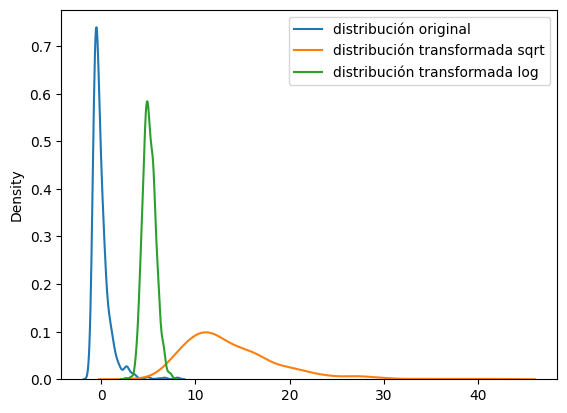

In [ ]:
sns.kdeplot(metros_estandar, label="distribuci√≥n original")
sns.kdeplot(metros_sqrt, label="distribuci√≥n transformada sqrt")
sns.kdeplot(metros_log, label="distribuci√≥n transformada log")
plt.legend();

* Contraste de hip√≥tesis:
    * Que las casas de X barrio son m√°s baratas de las de Y barrio
    * Que las casas de >= 3 ba√±os son m√°s caras que las casas de 1-2 ba√±os

In [136]:
alpha = 0.05

In [141]:
_, p_precio = stats.normaltest(precio)
_, p_metros = stats.normaltest(m2)
_, p_var= stats.levene(precio, m2)
print(f"prueba precio {p_precio} y prueba metros {p_metros}")
print(f"prueba de varianza {p_var}")

prueba precio 7.178523866543975e-105 y prueba metros 5.268452793143898e-152
prueba de varianza 1.959406957872913e-121


In [142]:
suposiciones = p_precio > alpha and p_metros > alpha and p_var > alpha
if suposiciones:
    print("Varianzas normales y homogeneas")
else:
    print("No hay homogeneidad ni normalidad de varianzas")  

No hay homogeneidad ni normalidad de varianzas


In [143]:
# contraste de hip√≥tesis:
if suposiciones:
    # prueba param√©trica
    _, p = stats.ttest_rel(precio, m2, alternative="greater")
else: 
    # prueba no par√°metrica
    _, p = stats.wilcoxon(precio, m2, alternative="greater")

print(f"contraste de hip√≥tesis p-value: {p}")

contraste de hip√≥tesis p-value: 1.2111614015552813e-151


In [144]:
if p < alpha:
    print("H1 VERDADERO (H alternativa): El consumo en city es mayor que en road. RECHAZAMOS H0 (H Nula).")
else:
    print("H0 VERDADERO (H nula): El consumo en city es menor o igual que en road. RECHAZAMOS H1 (H alternativa).")

H1 VERDADERO (H alternativa): El consumo en city es mayor que en road. RECHAZAMOS H0 (H Nula).
